## Exercise 1: Structuring a given code

### original

In [20]:
file_path = input("Enter the path to the CSV file: ")
records = []
with open(file_path, 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        records.append(row)

total = sum(float(record['Grade']) for record in records)
average = total / len(records)

print(f"Average Grade: {average}")
print("--------------------")

filtered_records = [record for record in records if float(record['Grade']) >= 80.0]

print("Student Report")
print("--------------")
for record in filtered_records:
    print(f"Name: {record['Name']}")
    print(f"Grade: {record['Grade']}")
    print("--------------------")


FileNotFoundError: [Errno 2] No such file or directory: ''

### changed

In [ ]:
#code used to load in the csv file
file_path = input("Enter the path to the CSV file: ")
records = []
with open(file_path, 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        records.append(row)

#this function return the average grade of all students from the inputted list
def avg_grade(inpt):
    total = sum(float(record['Grade']) for record in inpt)
    return total / len(records)

def avg_grade_print(inpt):
    print(f"Average Grade: {inpt}")
    print("--------------------")

#this function return a list of all students who achieved a grade higher that 80.0
def starstudents(inpt):
    return [item for item in inpt if float(item['Grade']) >= 80.0]

#this function prints the name and grade of all student in the input list
def student_report_print(inpt):
    print("Student Report")
    print("--------------")
    for record in inpt:
        print(f"Name: {record['Name']}")
        print(f"Grade: {record['Grade']}")
        print("--------------------")

#the part of the code that caused the desired values in the records to be found
filtered_records = starstudents(records)
average = avg_grade(records)

#prints the desired values
avg_grade_print(average)
student_report_print(filtered_records)



## Exercise 2: Mandelbrot visualisation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

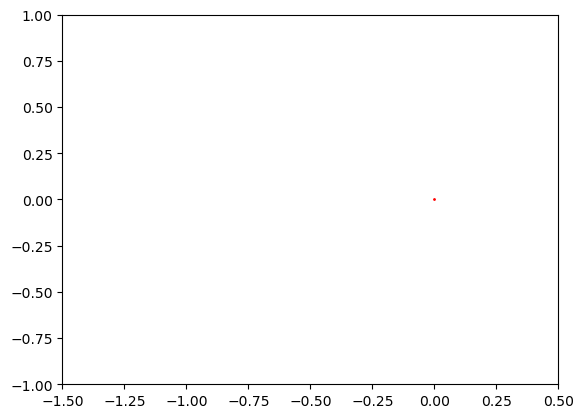

In [4]:
#this function makes a mandelbroth set with n amount of iterations using the complex value x+yj (n,x,y)
def mandelbroth(n,x,y):
    c = complex(x,y)
    a=np.array([0])
    for i in range(n):
        a=np.append(a,a[i]**2+c)
    return a
#this function takes a numpy array of complex numbers and puts these in a matplotlib.pyplot plot
def plot_complex(inpt):
    plt.plot(inpt.real, inpt.imag, 'o', color = 'red', markersize = 1)
    plt.xlim([-1.5,0.5])
    plt.ylim([-1,1])
#end of defining functions begining in inputing values
plot_complex(mandelbroth(10,1,1))
#this is wrong probably

C:\Users\olivi\AppData\Local\Temp\ipykernel_13776\1175999625.py:6: RuntimeWarning: overflow encountered in scalar power
  a=np.append(a,a[i]**2+c)
C:\Users\olivi\AppData\Local\Temp\ipykernel_13776\1175999625.py:6: RuntimeWarning: invalid value encountered in scalar power
  a=np.append(a,a[i]**2+c)


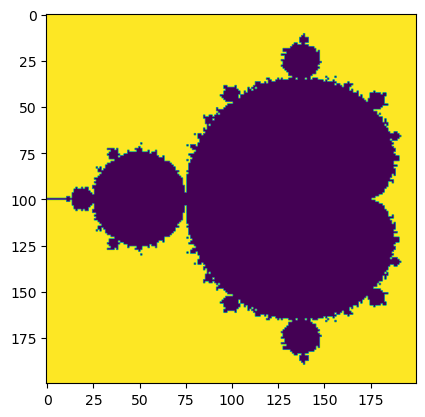

In [5]:
a=np.array([1]*200*200).reshape(200,200)
ii=-1
for n1 in np.arange(-1.5,0.5,1/200*2):
    ii+=1
    i=-1
    for n2 in np.arange(-1,1,1/200*2):
        i+=1
        if abs(mandelbroth(101,n1,n2)[100]) < 2:
            a[i,ii]=0
plt.imshow(a)


## Exercise 3: Google PageRank algorithm and the worldwide web

In [2]:
import networkx as nx
import random
import matplotlib.pyplot as plt

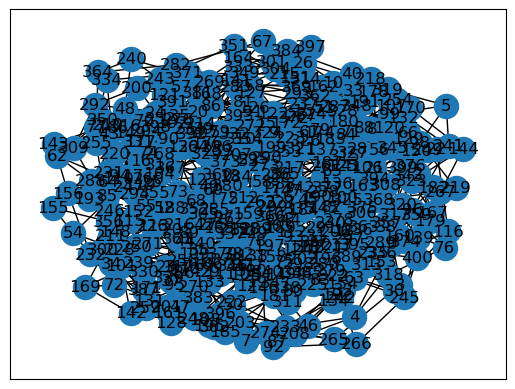

In [42]:
def list_of_nodes(n0,number_of_nodes):
    list1 = []
    for i in range(n0,number_of_nodes+1):
        list1.append(i)
    return list1
def adding_nodes(graph,list1):
    graph.add_nodes_from(list1)
    return graph
# defining a function that adds M edges to every node in the graph G
def adding_edges(graph,list1,number_of_nodes,number_of_edges):
    for i in range(1,number_of_nodes):
        # creating a copy of the list and then removing i so we don't have any nodes connected to themselves
        available_nodes = [n for n in list1 if (graph.degree[n] != 4 and n != i)]
        # Calculate number of edges to add for this node
        number_of_edges_to_add = max(0, number_of_edges - graph.degree[i])
        number_of_edges_to_add = min(number_of_edges_to_add, len(available_nodes))
        nodes_to_connect= random.choices(available_nodes,k = number_of_edges_to_add)
        for node in nodes_to_connect:
            graph.add_edge(i,node)
    return graph
# n0 is the number that the star graph starts with
n0 = 4
# N is the total number of webpages required(number of nodes)
N = 400
# M is the number of different connections that each page links to(number of edges per node)
M = 4
# Initialising the star graph
G = nx.star_graph(n0)
# Adding all the nodes to the graph first
G = adding_nodes(G,list_of_nodes(n0,N))
# Here n0 is 1 because we want to add at least 4 edges to every node, including the first 6 we initialised the graph with
G = adding_edges(G,list_of_nodes(1,N),N,M)
# Drawing the graph 
nx.draw_networkx(G,with_labels = True)

## Exercise 3.2 Directed Graph

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('squirrel_edges.csv')
edges_list = []
for i in range(len(df)):
    edges_list.append((df.iloc[i]['id1'],df.iloc[i]['id2']))

In [8]:
squirrel = nx.DiGraph()
squirrel.add_edges_from(edges_list)
